#Assignment 2 

Perform the following operations using R/Python on the data sets: 
a) Compute and display summary statistics for each feature available in the dataset. (e.g. 
minimum value, maximum value, mean, range, standard deviation, variance and 
percentiles 
b) Illustrate the feature distributions using histogram. 
c) Data cleaning, Data integration, Data transformation, Data model building (e.g. 
Classification)  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv(r"C:\Users\aayus\OneDrive\Desktop\ONE FOR ALL\class\ML\Datasets\Heart (1).csv")


In [4]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [7]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


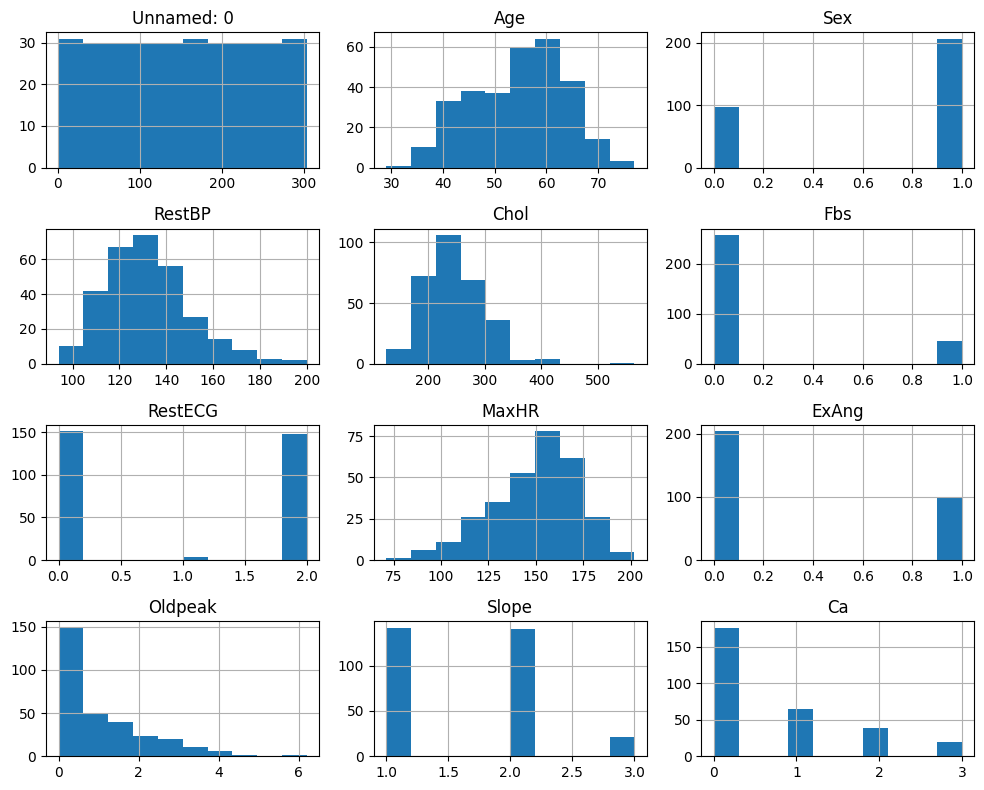

In [8]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [9]:
df.duplicated().sum()

0

In [10]:
summary = df.describe(include='all')  # covers numeric + object types
range_values = df.max(numeric_only=True) - df.min(numeric_only=True)
summary.loc['range'] = range_values
print("Summary statistics:")
print(summary)

Summary statistics:
        Unnamed: 0         Age         Sex     ChestPain      RestBP  \
count   303.000000  303.000000  303.000000           303  303.000000   
unique         NaN         NaN         NaN             4         NaN   
top            NaN         NaN         NaN  asymptomatic         NaN   
freq           NaN         NaN         NaN           144         NaN   
mean    152.000000   54.438944    0.679868           NaN  131.689769   
std      87.612784    9.038662    0.467299           NaN   17.599748   
min       1.000000   29.000000    0.000000           NaN   94.000000   
25%      76.500000   48.000000    0.000000           NaN  120.000000   
50%     152.000000   56.000000    1.000000           NaN  130.000000   
75%     227.500000   61.000000    1.000000           NaN  140.000000   
max     303.000000   77.000000    1.000000           NaN  200.000000   
range   302.000000   48.000000    1.000000           NaN  106.000000   

              Chol         Fbs     RestECG 

In [27]:
# Percentiles (25th, 50th, 75th)
percentiles = df.quantile([0.25, 0.5, 0.75], numeric_only=True)
print("\nPercentiles:\n", percentiles)



Percentiles:
            Age  Sex  ChestPain   RestBP      Chol  Fbs  RestECG     MaxHR  \
0.25 -0.713556  0.0        0.0 -0.66530 -0.690503  0.0      0.0 -0.705307   
0.50  0.172994  1.0        1.0 -0.09617 -0.110136  0.0      1.0  0.148562   
0.75  0.727089  1.0        1.0  0.47296  0.547614  0.0      2.0  0.717808   

      ExAng   Oldpeak  Slope   Ca  Thal  AHD  
0.25    0.0 -0.896862    1.0  0.0   1.0  0.0  
0.50    0.0 -0.206705    2.0  0.0   1.0  0.0  
0.75    1.0  0.483451    2.0  1.0   2.0  1.0  


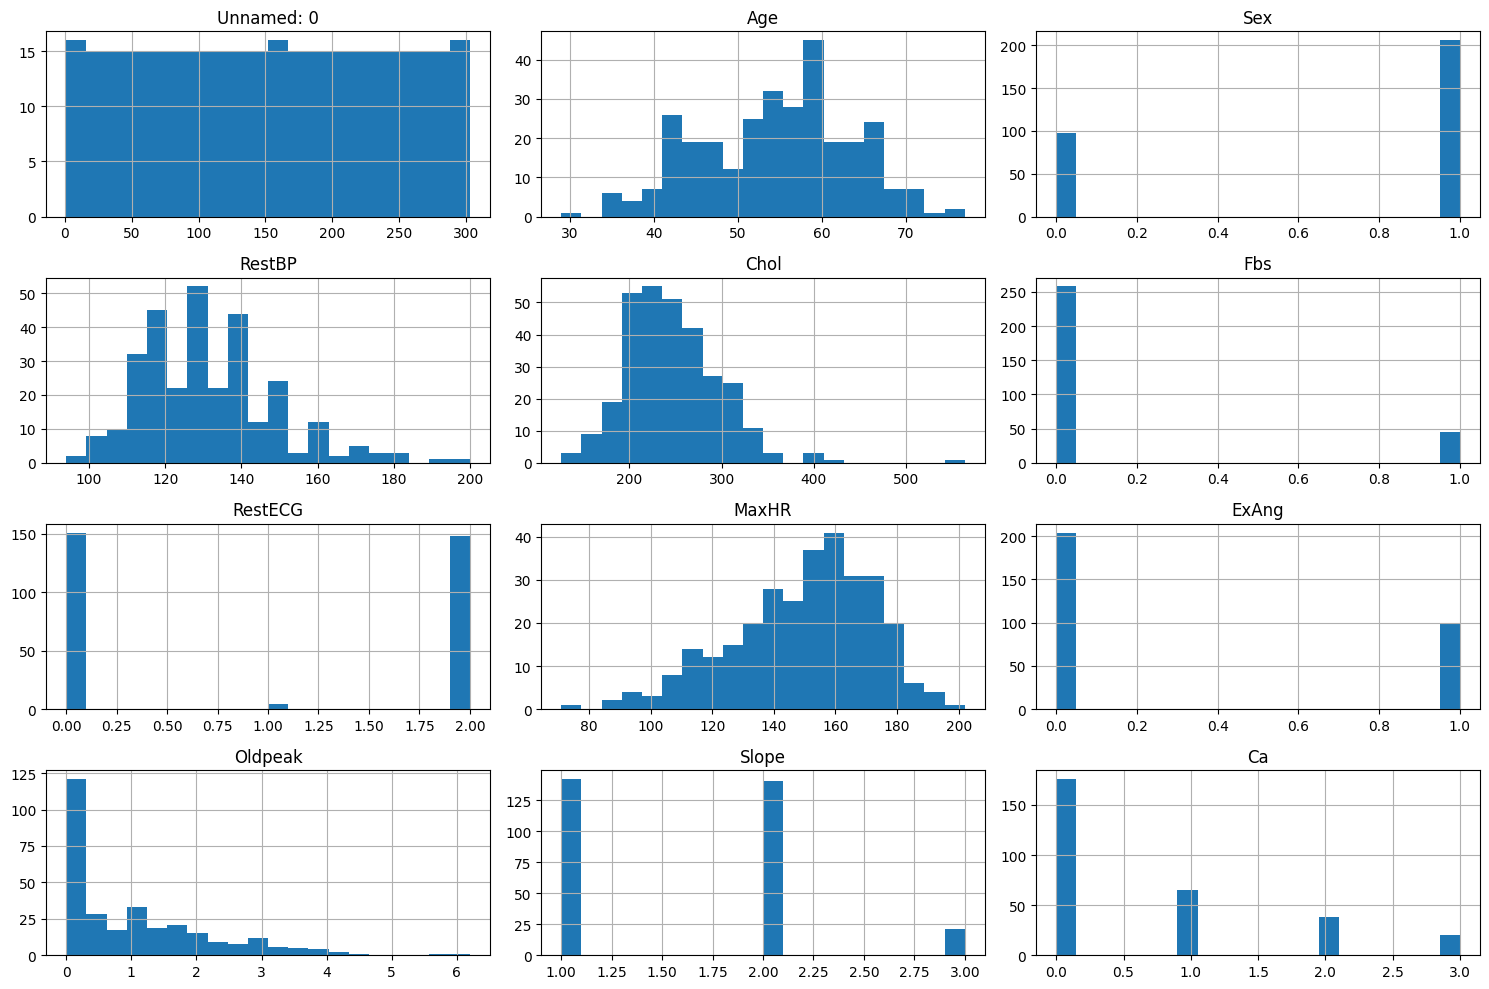

In [12]:
# ----- b) Histograms -----
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


#### ----- Data Cleaning -----

In [13]:
# Drop irrelevant column
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [14]:
# Handle missing values
df['Ca'].fillna(df['Ca'].median(), inplace=True)
df['Thal'].fillna(df['Thal'].mode()[0], inplace=True)
df.head()

C:\Users\shubh\AppData\Local\Temp\ipykernel_17512\4226255381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ca'].fillna(df['Ca'].median(), inplace=True)
C:\Users\shubh\AppData\Local\Temp\ipykernel_17512\4226255381.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [15]:

# Encode categorical variables
le = LabelEncoder()
df['ChestPain'] = le.fit_transform(df['ChestPain'])
df['Thal'] = le.fit_transform(df['Thal'])
df['AHD'] = df['AHD'].map({'Yes': 1, 'No': 0})  # Binary target


In [16]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [17]:
# ----- Data Transformation -----

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(df[['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']])

In [18]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,0.948726,1,3,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,0,0
1,1.392002,1,0,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,1,1
2,1.392002,1,0,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,2,1
3,-1.932564,1,1,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,1,0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,1,0


In [19]:
X = df.drop('AHD', axis=1)
y = df['AHD']

In [20]:
X.shape, y.shape

((303, 13), (303,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


In [22]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Confusion Matrix:
 [[27  2]
 [ 4 28]]

Accuracy Score: 0.9016393442622951


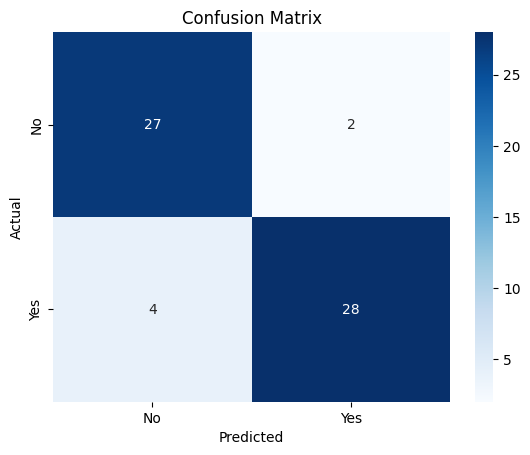

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

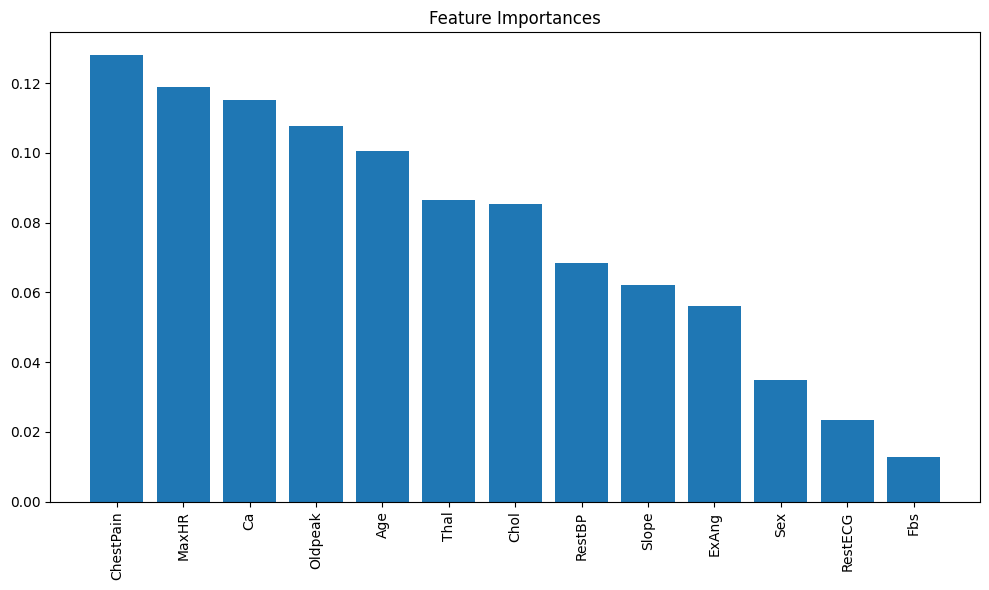

In [26]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


In [ ]:
# import pickle
# # Save the model to disk
# filename = 'heart_disease_model.pkl'
# pickle.dump(model, open(filename, 'wb'))
# # Load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# # Predicting a new result
# result = loaded_model.predict(X_test)
# print("Predicted result:", result)
# # Save the scaler to disk
# scaler_filename = 'scaler.pkl'
# pickle.dump(scaler, open(scaler_filename, 'wb'))
# # Load the scaler from disk
# loaded_scaler = pickle.load(open(scaler_filename, 'rb'))
# # Example of scaling new data   
# new_data = np.array([[45, 130, 250, 150, 2.5, 1, 0, 1, 0, 1]])
# scaled_data = loaded_scaler.transform(new_data)
# print("Scaled new data:", scaled_data)
# import matplotlib.pyplot as plt
# import seaborn as sns
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import numpy as np